In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf


In [4]:
symbols = ['AAPL', 'MSFT', 'AMD', 'INTC', 'NVDA']
start = '2021-01-01'
end = '2021-12-31'

In [5]:
df = pd.DataFrame()
data = []
for symbol in symbols:
    df = pd.merge(df, pd.DataFrame(yf.download(symbol, fields='price', 
                           start=start, end=end)['Adj Close']), 
                           right_index=True, left_index=True, how='outer')
       
    # Appends tickers which have data
    data.append(symbol)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [6]:
df.columns = data
df = df.dropna(axis='columns')
df.head()

,AAPL,MSFT,AMD,INTC,NVDA
Date,,,,,
2021-01-04,128.617111,215.880432,92.300003,48.414623,131.020569
2021-01-05,130.207306,216.088669,92.769997,49.330864,133.930511
2021-01-06,125.824326,210.485626,90.330002,49.808483,126.034920
2021-01-07,130.117844,216.475433,95.160004,50.870930,133.323547
2021-01-08,131.240936,217.794373,94.580002,50.344585,132.651642


In [7]:
df.describe()


,AAPL,MSFT,AMD,INTC,NVDA
count,251.000000,251.000000,251.000000,251.000000,251.000000
mean,140.464979,274.700897,100.975538,55.164169,194.764147
std,14.685267,37.325512,23.300485,4.188867,58.517582
min,115.819870,210.485626,73.089996,47.559265,115.831337
25%,128.154953,242.388962,82.309998,52.417484,143.040726
50%,140.904358,275.975830,92.150002,54.524048,191.997620
75%,148.653053,300.939423,109.954998,57.007460,222.292778
max,180.330002,343.109985,161.910004,66.938637,333.719147


In [8]:
from IPython.display import Latex, HTML

Latex(r"""\begin{eqnarray}r_t = \frac{AdjClose_t - AdjClose_{t-1}}{AdjClose_{t-1}} = \frac{AdjClose_t}{AdjClose_{t-1}} - 1
\end{eqnarray}""")

<IPython.core.display.Latex object>

([<matplotlib.axis.YTick at 0x19135c479d0>,
 [Text(0, 0, 'AAPL'),
  Text(0, 1, 'MSFT'),
  Text(0, 2, 'AMD'),
  Text(0, 3, 'INTC'),
  Text(0, 4, 'NVDA')])

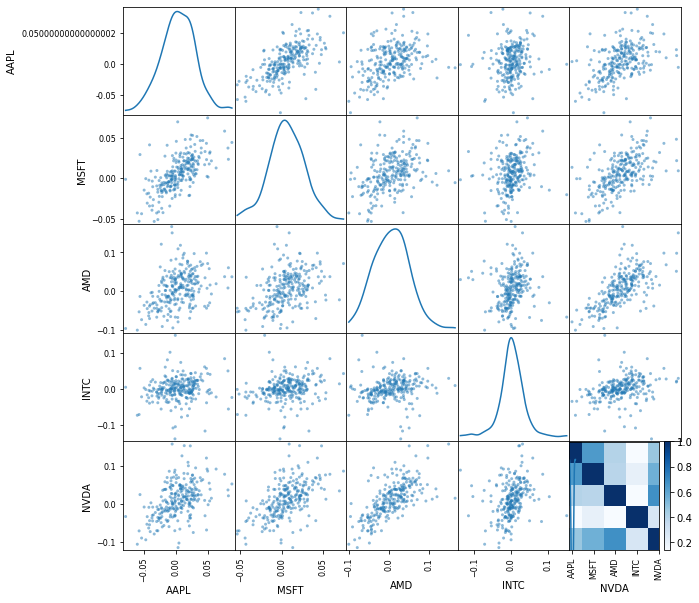

In [9]:
from pandas.plotting import scatter_matrix

rets = df.pct_change(periods=3)
scatter_matrix(rets, diagonal='kde', figsize=(10, 10))
corr = rets.corr()
plt.imshow(corr, cmap='Blues', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns)

Text(0, 0.5, 'Standard Deviations')

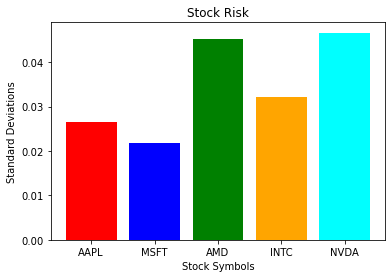

In [10]:
plt.bar(rets.columns, rets.std(), color=['red', 'blue', 'green', 'orange', 'cyan'])
plt.title("Stock Risk")
plt.xlabel("Stock Symbols")
plt.ylabel("Standard Deviations")

Text(0, 0.5, 'Returns')

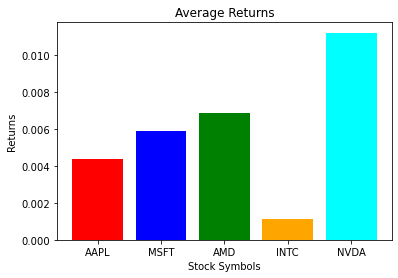

In [11]:
plt.bar(rets.columns, rets.mean(), color=['red', 'blue', 'green', 'orange', 'cyan'])
plt.title("Average Returns")
plt.xlabel("Stock Symbols")
plt.ylabel("Returns")

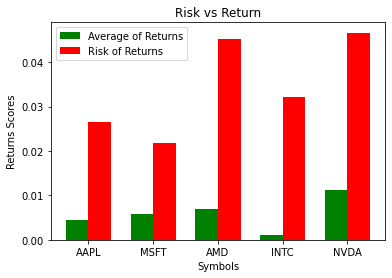

In [12]:
ind = np.arange(5)
width = 0.35       
plt.bar(ind, rets.mean(), width, color = 'g', label='Average of Returns')
plt.bar(ind + width, rets.std(), width, color = 'r', label='Risk of Returns')
plt.ylabel('Returns Scores')
plt.xlabel('Symbols')
plt.title('Risk vs Return')

plt.xticks(ind + width / 2, ('AAPL', 'MSFT', 'AMD', 'INTC', 'NVDA'))
plt.legend(loc='best')
plt.show()

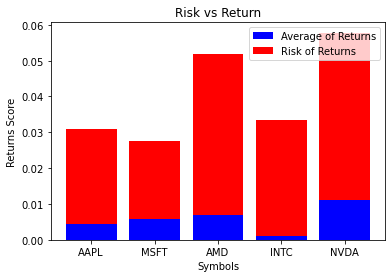

In [13]:
symbols = ['AAPL', 'MSFT', 'AMD', 'INTC', 'NVDA']
ind = [x for x, _ in enumerate(symbols)]

plt.bar(ind, rets.mean(), width=0.8, label='Average of Returns', color='b')
plt.bar(ind, rets.std(), width=0.8, label='Risk of Returns', color='r', bottom=rets.mean())

plt.xticks(ind, symbols)
plt.ylabel("Returns Score")
plt.xlabel("Symbols")
plt.legend(loc="upper right")
plt.title('Risk vs Return')
plt.show()

Table: Risk vs Expected Returns


,Risk,Expected Returns
AAPL,0.026526,0.004391
MSFT,0.021819,0.005874
AMD,0.045122,0.006864
INTC,0.032245,0.001144
NVDA,0.046609,0.011195


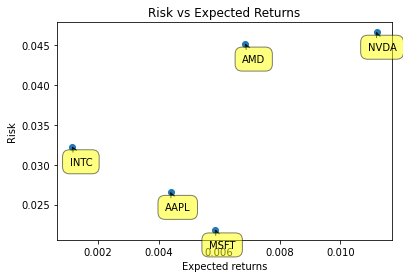

In [14]:
plt.scatter(rets.mean(), rets.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.title('Risk vs Expected Returns')
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.7', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
    
d = {'Risk':rets.std(), 'Expected Returns':rets.mean()}
print('Table: Risk vs Expected Returns')
tables = pd.DataFrame(data=d)
tables    